In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
%matplotlib inline

In [4]:
df_test = pd.read_csv('test.csv')
NU_INSCRICAO = df_test['NU_INSCRICAO']
df_test.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,...,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,...,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,...,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,...,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,...,0.0,320.0,D,H,H,C,B,A,NaN,A


In [5]:
df_train = pd.read_csv('train.csv').dropna(subset = ["NU_NOTA_MT"], axis=0)
y = df_train["NU_NOTA_MT"]
df_train = df_train[df_test.columns]
df_train["NU_NOTA_MT"] = y
df_train.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,NU_NOTA_MT
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,RS,24,M,1,1,1,4,1,...,520.0,D,D,C,A,A,C,H,A,399.4
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,CE,17,F,3,1,2,0,2,...,580.0,A,A,B,A,A,A,NaN,A,459.8
5,a37c99ec251d4f6e8ddbeabadf1c87fdbfddc4d1,29,BA,18,F,1,1,1,1,1,...,620.0,E,E,C,B,B,A,NaN,A,364.5
6,63b4e128e9ffe8ab27f5d093db1976ef4f353e0a,51,MT,18,F,3,1,2,0,2,...,560.0,E,D,C,B,B,C,E,A,529.2
7,2eb189d4912f64b19d1967e8e84b6141aba18770,43,RS,18,F,1,1,1,1,1,...,620.0,G,F,L,B,B,A,NaN,D,566.7


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10133 entries, 0 to 13729
Data columns (total 48 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NU_INSCRICAO            10133 non-null  object 
 1   CO_UF_RESIDENCIA        10133 non-null  int64  
 2   SG_UF_RESIDENCIA        10133 non-null  object 
 3   NU_IDADE                10133 non-null  int64  
 4   TP_SEXO                 10133 non-null  object 
 5   TP_COR_RACA             10133 non-null  int64  
 6   TP_NACIONALIDADE        10133 non-null  int64  
 7   TP_ST_CONCLUSAO         10133 non-null  int64  
 8   TP_ANO_CONCLUIU         10133 non-null  int64  
 9   TP_ESCOLA               10133 non-null  int64  
 10  TP_ENSINO               3639 non-null   float64
 11  IN_TREINEIRO            10133 non-null  int64  
 12  TP_DEPENDENCIA_ADM_ESC  3639 non-null   float64
 13  IN_BAIXA_VISAO          10133 non-null  int64  
 14  IN_CEGUEIRA             10133 non-null

In [7]:
label_features = ["CO_UF_RESIDENCIA", "TP_SEXO", 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
'TP_LINGUA', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047']
num_features = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO', "NU_NOTA_COMP3",
                'NU_NOTA_COMP5', 'NU_NOTA_COMP4', 'NU_NOTA_COMP2', 'NU_NOTA_COMP1']
drop_features = ["NU_INSCRICAO", "CO_UF_RESIDENCIA"]
useful_features = label_features + num_features

# Filling Nans

In [8]:
X = df_train[useful_features]
X[num_features] = X[num_features].fillna(df_train[num_features].mean())
df_test[num_features] = df_test[num_features].fillna(df_test[num_features].mean())

for col in label_features:
    most_recurrent = df_train[col].value_counts().index[0]
    X[col] = X[col].fillna(most_recurrent)
    df_test[col] = df_test[col].fillna(most_recurrent)

df_test = df_test[useful_features]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


# One hot encoder

In [9]:
OH_encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
OH_X_train = pd.DataFrame(OH_encoder.fit_transform(X[label_features]))
OH_X_test = pd.DataFrame(OH_encoder.transform(df_test[label_features]))

OH_X_train.index = X.index
OH_X_test.index = df_test.index

X_numeric = X.drop(label_features, axis=1)
df_test_numeric = df_test.drop(label_features, axis=1)

final_X = pd.concat([X_numeric, OH_X_train], axis = 1)
final_df_test = pd.concat([df_test_numeric, OH_X_test], axis=1)

# Base models

In [10]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
lasso = Lasso(alpha =0.0005, random_state=1)
ENet = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
models = [lasso, ENet, KRR, GBoost, model_xgb]

In [ ]:
class modelPredict:
    def __init__(self, models):
        self.models = models
    
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        for model in self.models_:
            model.fit(X, y)    
        return self
    
    def predict(self, X):
        predictions=np.column_stack([model.predict(X) for model in self.models_])
        return np.mean(predictions, axis=1)

final_model = modelPredict(models)
final_model.fit(final_X, y)    


model = LinearRegression()
model.fit(final_X, y)
pred1 = model.predict(final_X)
plt.plot(pred1, y, "x", label = "Linear")

pred2 = final_model.predict(final_X)
plt.plot(pred2, y, "x", label = "Mega")
plt.plot([0, 1000], [0, 1000], color='k')

plt.legend()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8091953.726867363, tolerance: 10096.836723647883
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11682355.910874136, tolerance: 10096.836723647883
  positive)


In [ ]:
result = model.predict(final_df_test)

In [149]:
df_result = pd.DataFrame(np.array([NU_INSCRICAO, result]).T, columns=["NU_INSCRICAO", "NU_NOTA_MT"])
df_result.head()
df_result.loc[df_result["NU_NOTA_MT"] < 0, "NU_NOTA_MT"] = 0
df_result.to_csv("answer.csv", index=False)
df_result.head()

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,447.013
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,437.884
2,b38a03232f43b11c9d0788abaf060f7366053b6d,587.873
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0
4,715494628a50142ce8cb17191cfe6d0f3cae0934,556.251


In [121]:
df_train.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047', 'NU_NOTA_MT'],
      dtype='object')

# More data exploration

In [95]:
label_features = ["CO_UF_RESIDENCIA", "TP_SEXO", 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
'TP_LINGUA', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max

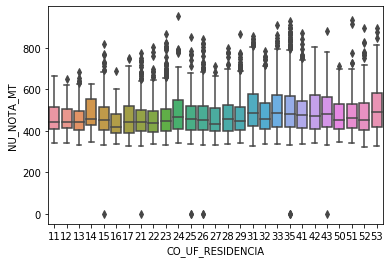

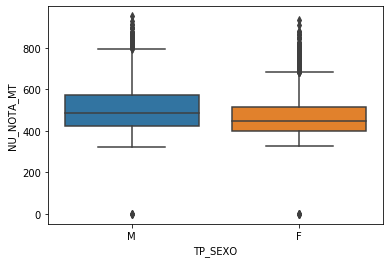

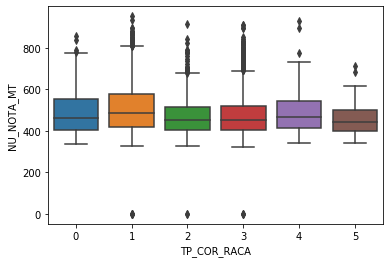

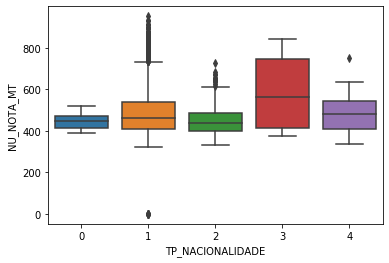

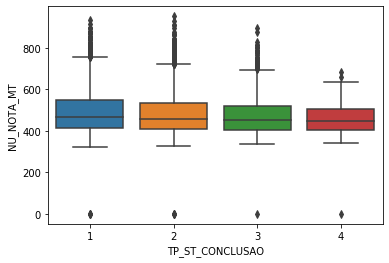

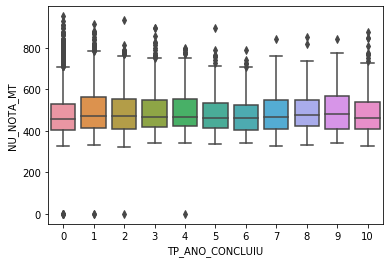

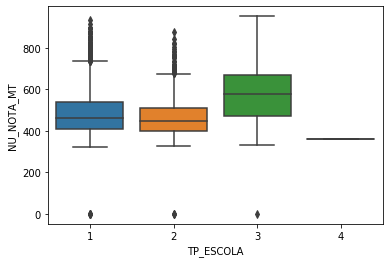

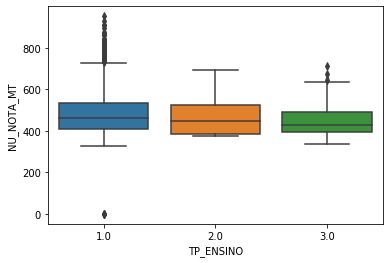

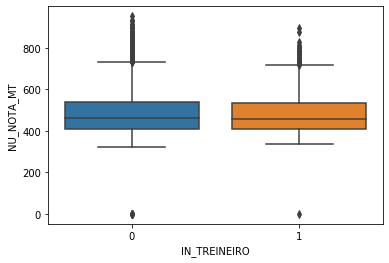

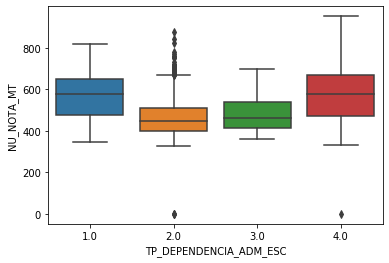

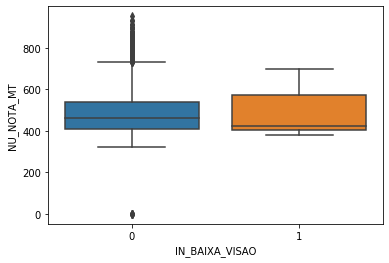

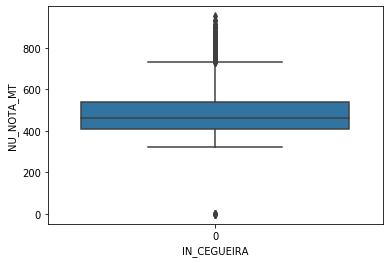

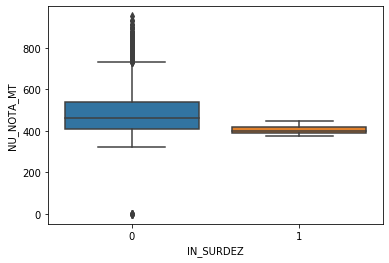

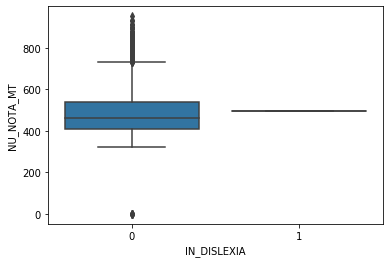

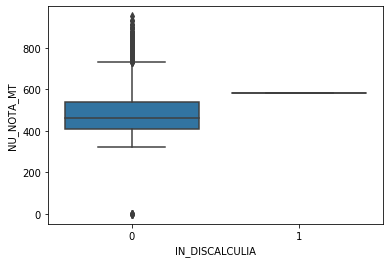

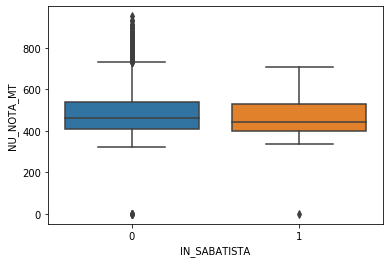

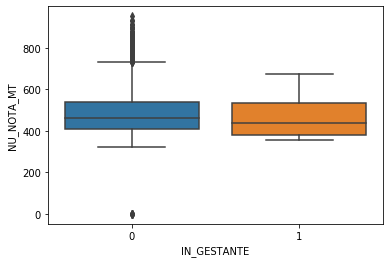

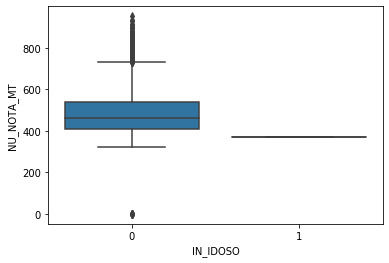

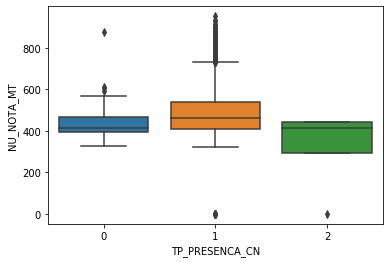

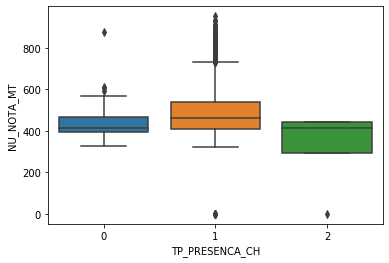

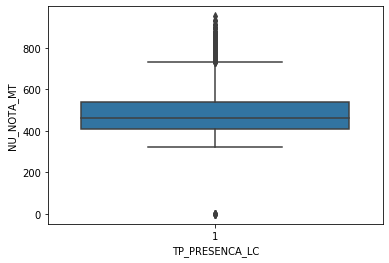

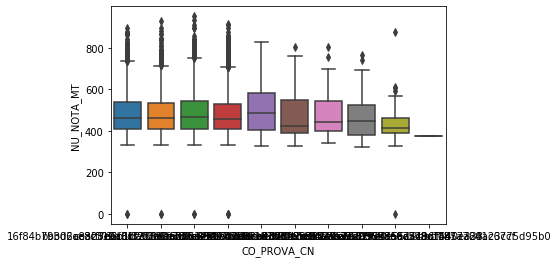

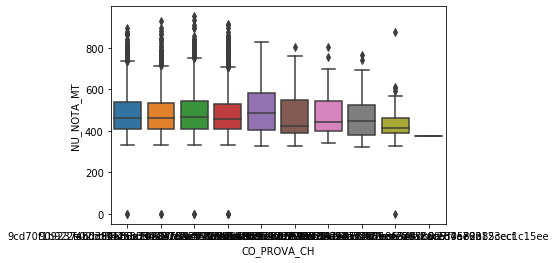

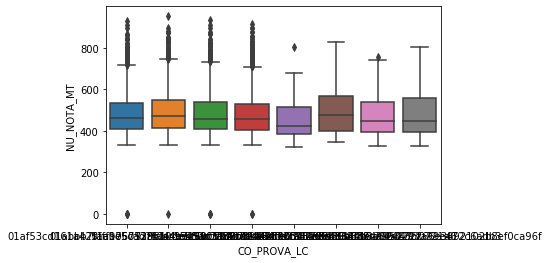

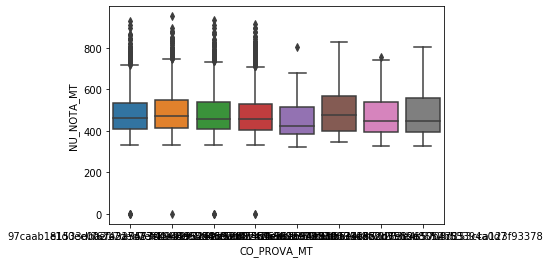

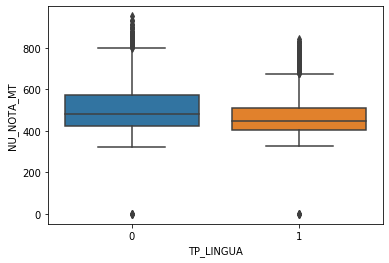

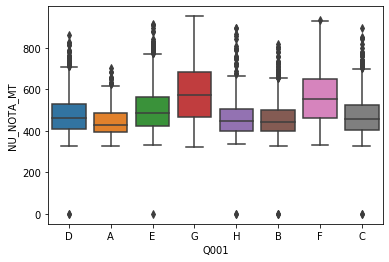

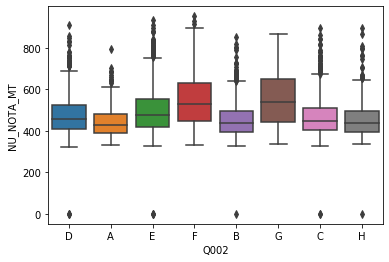

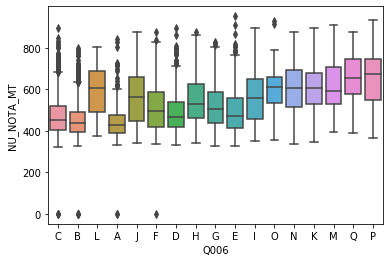

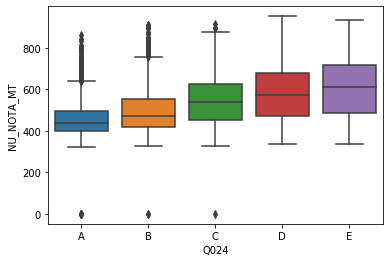

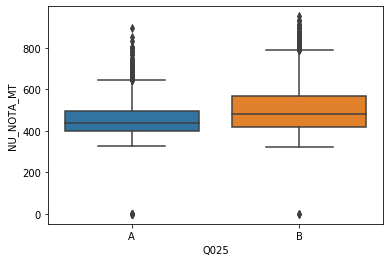

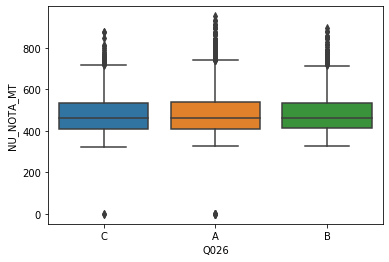

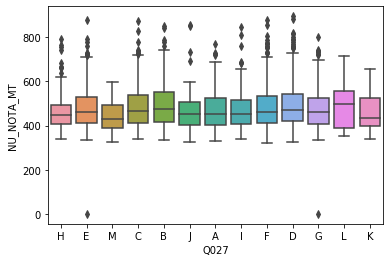

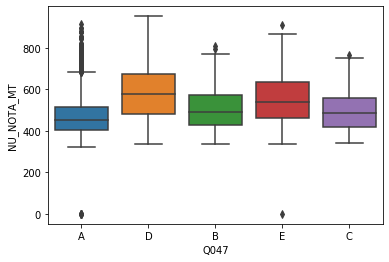

In [97]:
for col in label_features:
    plt.figure()
    sns.boxplot(x=col, y="NU_NOTA_MT", data = df_train)

In [108]:
pd.set_option('display.max_columns', None)
df_train[df_train["NU_NOTA_MT"] == 0].describe()

,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,NU_NOTA_MT
count,10.000000,10.000000,10.000000,10.0,10.000000,10.000000,10.000000,4.0,10.000000,4.0,10.0,10.0,10.0,10.0,10.0,10.000000,10.0,10.0,10.000000,10.000000,10.0,9.000000,9.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0
mean,28.600000,21.500000,1.800000,1.0,1.900000,0.800000,1.500000,1.0,0.100000,2.5,0.0,0.0,0.0,0.0,0.0,0.100000,0.0,0.0,1.100000,1.100000,1.0,342.755556,391.911111,131.650000,0.500000,1.80000,90.000000,80.000000,78.000000,74.000000,52.000000,374.000000,0.0
std,8.248906,8.236099,0.918937,0.0,0.994429,1.316561,0.707107,0.0,0.316228,1.0,0.0,0.0,0.0,0.0,0.0,0.316228,0.0,0.0,0.316228,0.316228,0.0,197.485228,168.364392,216.520511,0.527046,1.75119,52.704628,47.140452,44.671642,46.236109,44.422217,224.509342,0.0
min,15.000000,16.000000,1.000000,1.0,1.000000,0.000000,1.000000,1.0,0.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,25.000000,17.250000,1.000000,1.0,1.000000,0.000000,1.000000,1.0,0.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.000000,1.000000,1.0,366.600000,366.900000,0.000000,0.000000,1.00000,80.000000,65.000000,80.000000,60.000000,25.000000,345.000000,0.0
50%,26.000000,18.500000,1.500000,1.0,2.000000,0.000000,1.000000,1.0,0.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.000000,1.000000,1.0,434.900000,381.700000,0.000000,0.500000,1.00000,110.000000,90.000000,80.000000,80.000000,40.000000,380.000000,0.0
75%,35.000000,21.750000,2.750000,1.0,2.000000,1.000000,2.000000,1.0,0.000000,2.5,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.000000,1.000000,1.0,457.800000,506.200000,281.925000,1.000000,1.00000,120.000000,120.000000,115.000000,100.000000,75.000000,530.000000,0.0
max,43.000000,44.000000,3.000000,1.0,4.000000,4.000000,3.000000,1.0,1.000000,4.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,2.000000,2.000000,1.0,493.800000,565.200000,546.400000,1.000000,6.00000,160.000000,120.000000,120.000000,140.000000,140.000000,680.000000,0.0


In [161]:
model.score(final_X, y)

0.45708759223544737